In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [67]:
random.seed(1)

## Problem 1

In [68]:
# Generating the samples
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
# https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html
X1_1 = np.random.normal(1,1,200) # mean = 1, var = 1, n = 200
X2_1 = np.random.normal(0,1,200) # mean = 0, var = 1, n = 200

X1_2 = np.random.normal(-1,1,200) # mean = -1, var = 1, n = 200
X2_2 = np.random.normal(0,1,200) # mean = 0, var = 1, n = 200

X1 = np.concatenate((X1_1, X1_2))
X2 = np.concatenate((X2_1, X2_2))
X = np.vstack((X1, X2)).T

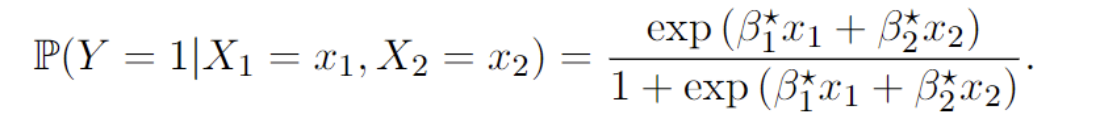

In [69]:
# Generate values for Y based on above random values
# https://www.w3schools.com/python/numpy/numpy_ufunc_create_function.asp
def generate_y(X1, X2):
    beta_1 = 5
    beta_2 = -1
    
    probs = np.exp(beta_1*X1 + beta_2*X2)/(1+np.exp(beta_1*X1 + beta_2*X2))
    
    y = np.random.binomial(n = 1, p = probs)
    return(y)

In [70]:
Y = generate_y(X1, X2)

In [71]:
Y.shape

(400,)

In [72]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,

In [73]:
X.shape

(400, 2)

## Gradient Descent

In [75]:
# Initialize the coefficients and learning rate
beta1 = 0 
beta2 = 0
alpha = 0.1 # learning Rate

In [76]:
def gradient_descent(X, Y, beta1, beta2, alpha):
    dl_dbeta1 = 0.0
    dl_dbeta2 = 0.0
    
    n = X.shape[0]
    # loss = (y - yhat)**2; (y-(wx+b))**2
    for x1_i, x2_i, y_i in zip(X[:,0], X[:,1], Y):
        dl_dbeta1 += -2*x1_i*(y_i - (beta1*x1_i + beta2*x2_i))
        #print(f'x1_i: {x1_i}, x2_i: {x2_i}, y_i: {y_i}')
        dl_dbeta2 += -2*x2_i*(y_i - (beta1*x2_i + beta2*x2_i))
    
    beta1 = beta1 - alpha*(1/n)*dl_dbeta1
    beta2 = beta2 - alpha*(1/n)*dl_dbeta2
    
    return(beta1, beta2)

    p = np.exp(beta_1*X1 + beta_2*X2) / (1 + np.exp(beta_1*X1 + beta_2*X2))
    error = Y - p
    
    # Updating parameters
    beta_1_new = beta_1 + learning_rate * np.mean(error * X1)
    beta_2_new = beta_2 + learning_rate * np.mean(error * X2)
    
    
    # Calculate the change in beta1 and beta2
    delta = np.sqrt((beta_1_new - beta_1)*2 + (beta_2_new - beta_2)*2)
    
    # Update beta1 and beta2
    beta_1 = beta_1_new
    beta_2 = beta_2_new

In [78]:
beta1_new = 1
beta2_new = 1
N = 1
max_iters = 10000
tolerance = 1e-6
while True:
    change = np.sqrt((beta1_new - beta1)*2 + (beta2_new - beta2)*2)
    beta1_new, beta2_new = beta1, beta2
    beta1, beta2 = gradient_descent(X, Y, beta1, beta2, alpha)
    yhat = beta1*X[:,0] + beta2*X[:,1]

    loss = np.divide(np.sum((Y - yhat)**2, axis = 0), X.shape[0])
    
    p = np.exp(beta1*X1 + beta2*X2) / (1 + np.exp(beta1*X1 + beta2*X2))
    log_likelihood = np.sum(Y*np.log(p) + (1-Y)*np.log(1-p))
    #beta1_new, beta2_new = beta1, beta2
    if N%100 == 0:
        print(f'for epoch no. {N}, the parameters are: beta1: {beta1}, beta2: {beta2}')
        print(f'The loss is: {loss}')
        print(f'The log likelihood is: {log_likelihood}')
    
    N+=1
    max_iters -= 1
    
    if (tolerance < change or max_iters == 0):
        break

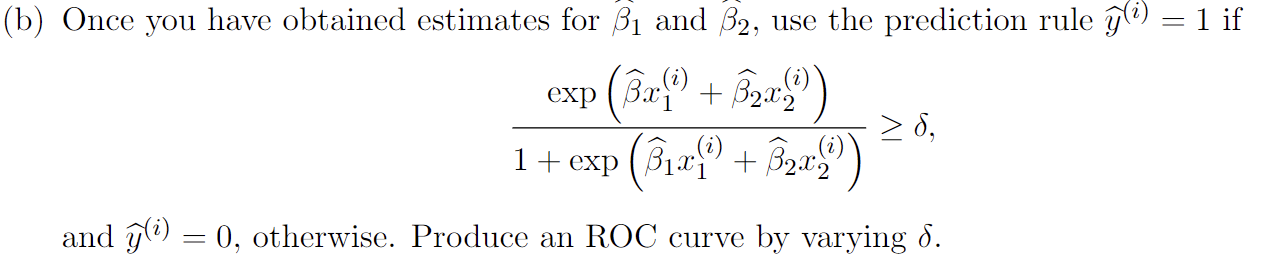

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [80]:
def predict_y(X1, X2, Y, beta1_new, beta2_new, delta):
    
    probs = np.exp(beta1_new*X1 + beta2_new*X2)/(1+np.exp(beta1_new*X1 + beta2_new*X2))
    
    #y = np.random.binomial(n = 1, p = probs) # y contains predictions. Y contains generated values from earlier
    y = probs > delta
    y = y.astype(int)
    fpr, tpr, _ = metrics.roc_curve(y, Y)

    #create ROC curve
    auc = metrics.roc_auc_score(y, Y)
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.legend(loc=4)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return(y)

In [87]:
y_pred = predict_y(X1,X2,Y,beta1_new,beta2_new,delta = 0.6)

C:\Users\arjun\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [56]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression()
clf.fit(X, Y).score(X,Y)

0.89

In [58]:
cols = np.array(['X1', 'X2'])

In [59]:
pd.DataFrame(zip(cols, np.transpose(clf.coef_)), columns=['features', 'coef']) 

,features,coef
0,X1,[3.1766043106850903]
1,X2,[-0.5908635171433205]


In [ ]:

'''
y_pred= clf.predict(X_test)
from sklearn.metrics import accuracy_score
print( 'Accuracy Score',accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))
'''

Iteration 1000: Log-Likelihood: = -65.61053802121947
Iteration 2000: Log-Likelihood: = -64.64018129967221
Iteration 3000: Log-Likelihood: = -64.51209599386895
Iteration 4000: Log-Likelihood: = -64.48968163537288
Iteration 5000: Log-Likelihood: = -64.4853613075176
Iteration 6000: Log-Likelihood: = -64.4844951085964
Iteration 7000: Log-Likelihood: = -64.48431844563017
Iteration 8000: Log-Likelihood: = -64.48428213933678
Iteration 9000: Log-Likelihood: = -64.48427465231664
Iteration 10000: Log-Likelihood: = -64.48427310595466
Iteration 11000: Log-Likelihood: = -64.48427278634512
Iteration 12000: Log-Likelihood: = -64.48427272026551
Iteration 13000: Log-Likelihood: = -64.48427270660149
Iteration 14000: Log-Likelihood: = -64.48427270377583
Iteration 15000: Log-Likelihood: = -64.48427270319148
Iteration 16000: Log-Likelihood: = -64.48427270307064
Iteration 17000: Log-Likelihood: = -64.48427270304566
Iteration 18000: Log-Likelihood: = -64.48427270304047
Iteration 19000: Log-Likelihood: = -64.

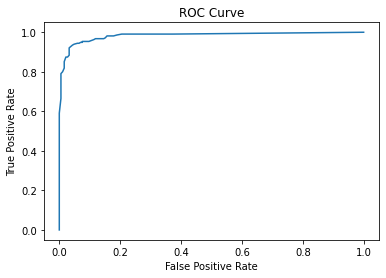

False positive rate: 0.04864864864864865
False negative rate: 0.06046511627906977


In [91]:
import numpy as np

# Setting seed for reproducibility
np.random.seed(1)

beta_1_star = 5
beta_2_star = -1

# First 200 samples
X1_1 = np.random.normal(1, 1, 200)
X2_1 = np.random.normal(0, 1, 200)
Y_1 = np.random.binomial(n=1, p= np.exp(beta_1_star*X1_1 + beta_2_star*X2_1) / (1 + np.exp(beta_1_star*X1_1 + beta_2_star*X2_1)), size=200)

# Second 200 samples
X1_2 = np.random.normal(-1, 1, 200)
X2_2 = np.random.normal(0,1,200)
Y_2 = np.random.binomial(n=1, p= np.exp(beta_1_star*X1_2 + beta_2_star*X2_2) / (1 + np.exp(beta_1_star*X1_2 + beta_2_star*X2_2)), size=200)

# Combine the two sets
X1 = np.concatenate([X1_1, X1_2])
X2 = np.concatenate([X2_1, X2_2])
Y = np.concatenate([Y_1, Y_2])

# Initializing parameters
beta_1 = 0
beta_2 = 0

# Setting hyperparameters
learning_rate = 0.1
#max_iterations = 10000
tolerance = 1e-6

# Initializing variables for tracking function value and iterations
log_likelihoods = []
iteration = 0

# Define the log-likelihood function
def log_likelihood(beta_1, beta_2, X1, X2, Y):
    p = np.exp(beta_1*X1 + beta_2*X2) / (1 + np.exp(beta_1*X1 + beta_2*X2))
    return np.sum(Y*np.log(p) + (1-Y)*np.log(1-p))

# Implementing gradient descent
while True: #iteration < max_iterations:
    # Computing predicted probabilities and errors
    p = np.exp(beta_1*X1 + beta_2*X2) / (1 + np.exp(beta_1*X1 + beta_2*X2))
    error = Y - p
    
    # Updating parameters
    beta_1_new = beta_1 + learning_rate * np.mean(error * X1)
    beta_2_new = beta_2 + learning_rate * np.mean(error * X2)
    
    
    # Calculate the change in beta1 and beta2
    delta = np.sqrt((beta_1_new - beta_1)*2 + (beta_2_new - beta_2)*2)
    
    # Update beta1 and beta2
    beta_1 = beta_1_new
    beta_2 = beta_2_new
    
    # Calculate the log-likelihood
    ll = log_likelihood(beta_1, beta_2, X1, X2, Y)
    log_likelihoods.append(ll)
    
    ## Computing current function value
    #f_value = np.sum(np.log(1 + np.exp(beta_1*X1 + beta_2*X2))) + np.sum(Y*(beta_1*X1 + beta_2*X2))
    
    # Checking for convergence
    if iteration > 0 and delta < tolerance:
        break
    
    iteration += 1
    
    # Printing progress every 1000 iterations
    if iteration % 1000 == 0:
        print(f"Iteration {iteration}: Log-Likelihood: = {ll}")

# Printing final parameters and function value
print(f"beta_1* = {beta_1:.3f}")
print(f"beta_2* = {beta_2:.3f}")
print(f"Log-Likelihood: {ll:.3f}")

from sklearn.linear_model import LogisticRegression

# Reshape the data to be in the format expected by sklearn
X = np.vstack((X1, X2)).T

# Fit the logistic regression model
clf = LogisticRegression(random_state=1, solver='lbfgs').fit(X, Y)

# Print the estimates
print("Beta1 estimate:", clf.coef_[0][0])
print("Beta2 estimate:", clf.coef_[0][1])

from sklearn.metrics import roc_curve

# Define a function to compute predicted labels for given beta and threshold
def predict_labels(X1, X2, beta1, beta2, threshold):
    z = beta1*X1 + beta2*X2
    y_cap = np.where((np.exp(z)/(1+np.exp(z))) >= threshold, 1, 0)
    return y_cap

# Define a range of thresholds to try
thresholds = np.linspace(0, 1)

def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1
    # print(TP, FP, TN, FN)
    # Sensitivity or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # False positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    return TPR, TNR, FPR, FNR


# Compute predicted labels for each threshold and compute TPR, FPR, and FNR
TPRs = []
FPRs = []
for threshold in thresholds:
    y_cap = predict_labels(X1, X2, beta_1, beta_2, threshold)
    TPR, TNR, FPR, FNR = perf_measure(Y, y_cap)
    TPRs.append(TPR)
    FPRs.append(FPR)
    

special_threshold = 0.5
y_cap = predict_labels(X1, X2, beta_1, beta_2, special_threshold)
TPR_lr, TNR_lr, FPR_lr, FNR_lr = perf_measure(Y, y_cap)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.plot(FPRs, TPRs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('False positive rate:',FPR_lr)
print('False negative rate:',FNR_lr)